# **DATA SCIENCE III - CODERHOUSE - [61730]**

# ALUMNO: Marcos Daniel Amenabar

# **DESCRIPCIÓN DEL PROBLEMA:**

Con el crecimiento del comercio electrónico, plataformas como Amazon generan millones de reseñas de productos diariamente. Estas opiniones contienen información valiosa sobre la percepción de los consumidores, pero debido a su volumen masivo, es imposible analizarlas manualmente de manera eficiente.
Las empresas buscan aprovechar estos datos para mejorar sus productos y estrategias de venta, pero enfrentan desafíos como la variabilidad del lenguaje, el uso de expresiones subjetivas y la presencia de ruido textual. Además, la clasificación automática de sentimiento se complica por la ambigüedad en las opiniones y el uso de términos coloquiales o sarcásticos.
Para abordar este problema, se utilizarán técnicas de procesamiento de lenguaje natural (NLP) que permitan interpretar la polaridad de las reseñas y determinar si una opinión es positiva o negativa. Esto facilitará la toma de decisiones en plataformas de comercio electrónico y mejorará la experiencia del usuario.


# **OBJETIVO:**
Desarrollar un modelo de análisis de sentimiento que clasifique automáticamente reseñas de productos en Amazon como positivas o negativas, utilizando técnicas de procesamiento de lenguaje natural (NLP) y aprendizaje automático para mejorar la interpretación de opiniones de los consumidores.


FUENTE: https://www.kaggle.com/datasets/bittlingmayer/amazonreviews/data

# INSTALACIÓN DE LIBRERIAS Y ARCHIVOS


In [1]:
# Descargar los modelos y recursos necesarios para el procesamiento de lenguaje natural (NLP)

# Descarga el modelo de lenguaje en inglés de spaCy
!python -m spacy download en_core_web_sm
# Este modelo incluye tokenización, etiquetado gramatical y reconocimiento de entidades en inglés,
# lo que facilita el procesamiento avanzado de texto en las reseñas de Amazon.

# Importar NLTK (Natural Language Toolkit) para análisis de texto
import nltk

# Descargar los recursos básicos de NLTK

# Descarga 'punkt', un paquete de tokenización en inglés
nltk.download('punkt')
# Permite dividir frases en palabras y oraciones, esencial para procesar texto.

# Descargar el lexicón de VADER (Valence Aware Dictionary for Sentiment Reasoning)
nltk.download("vader_lexicon")
# Herramienta para análisis de sentimiento basada en reglas, particularmente útil en texto corto como reseñas.

# Descargar el corpus de palabras en inglés
nltk.download('words')
# Contiene una lista extensa de palabras en inglés, utilizada para validaciones de vocabulario y filtrado.

# Descargar el conjunto de stopwords en inglés
nltk.download('stopwords')
# Proporciona una lista de palabras comunes en inglés como "the", "and", "is", que pueden eliminarse para mejorar el análisis.

# Propósito de estas descargas:
# - spaCy ayuda a estructurar el texto mediante tokenización y reconocimiento gramatical.
# - NLTK proporciona herramientas clave para procesar y limpiar texto en el dataset de Amazon.
# - VADER permite realizar análisis de sentimiento de manera eficiente, especialmente en reseñas escritas informalmente.
# - Eliminar stopwords y validar palabras en inglés** ayuda a mejorar la precisión del análisis.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 90.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# IMPORTACIÓN DE LIBRERÍAS Y CARGA DE DATOS:

In [2]:
# Importación de librerías necesarias para el análisis de sentimiento en reseñas de Amazon
import pandas as pd  # Manejo de estructuras de datos como DataFrames.
import os  # Para manipulación de archivos y rutas en el sistema.
import random  # Generación de valores aleatorios, útil para muestreo de datos.
import re  # Expresiones regulares, esenciales para limpieza y preprocesamiento de texto.
import spacy  # Biblioteca para procesamiento de lenguaje natural (NLP), utilizada para tokenización y análisis de texto.
import seaborn as sns  # Visualización de datos, particularmente útil para gráficos estadísticos.
import matplotlib.pyplot as plt  # Base de visualización para gráficos y diagramas.

# Librerías adicionales para análisis de texto y modelado
from collections import Counter  # Contador de elementos, útil para análisis de frecuencia en palabras.
from nltk.tokenize import word_tokenize  # Tokenización de texto, separa el contenido en palabras individuales.
from textblob import TextBlob  # Herramienta para análisis de sentimiento y corrección gramatical en texto.
from nltk.sentiment import SentimentIntensityAnalyzer  # Calcula puntuaciones de sentimiento en base a texto.
from spacy.lang.en.stop_words import STOP_WORDS  # Lista de stopwords en inglés, útil para limpieza de texto.
from nltk.corpus import words  # Diccionario de palabras en inglés, utilizado para validaciones y procesamiento.
from wordcloud import STOPWORDS  # Conjunto de palabras comunes que pueden eliminarse en análisis de texto.
from wordcloud import WordCloud  # Generación de nubes de palabras, útil para visualización de términos más frecuentes.
from nltk.corpus import stopwords  # Stopwords adicionales de NLTK, complementan la lista de palabras irrelevantes.
from sklearn.feature_extraction.text import TfidfVectorizer  # Conversión de texto en valores numéricos mediante TF-IDF.
from sklearn.model_selection import train_test_split  # Divide los datos en conjuntos de entrenamiento y prueba.
from sklearn.linear_model import LogisticRegression  # Modelo de clasificación binaria basado en regresión logística.
from sklearn.metrics import accuracy_score  # Mide la precisión del modelo comparando predicciones con datos reales.
from sklearn.ensemble import RandomForestClassifier  # Algoritmo basado en múltiples árboles de decisión para clasificación.
from sklearn.model_selection import GridSearchCV  # Búsqueda de hiperparámetros óptimos para mejorar el modelo.
from sklearn.metrics import confusion_matrix  # Matriz de confusión para evaluar los errores y aciertos del modelo.

##  Propósito de estas librerías en el proyecto:
# - Permiten **procesar**, **limpiar** y **analizar** texto de reseñas de Amazon.
# - Ayudan a construir modelos de **clasificación de sentimiento** para identificar si una reseña es positiva o negativa.
# - Facilitan la **visualización** de tendencias en los comentarios mediante gráficos y nubes de palabras.
# - Proveen herramientas para **optimizar y evaluar** el rendimiento de los modelos de aprendizaje automático.

In [3]:
# Definir rutas de los archivos dentro de Colab
#train_path = "/content/train.ft.txt"
#test_path = "/content/test.ft.txt"
#No ejecutar estas líneas, ya que está subido el Dataset recortado, esto fue un proceso para el inicio del trabajo, y limpiar el dataset Original.

In [4]:
# Cargar los datasets
#df_train = pd.read_csv(train_path, delimiter='\t', header=None, names=['Label', 'Text'])
#df_test = pd.read_csv(test_path, delimiter='\t', header=None, names=['Label', 'Text'])

In [5]:
# Info del dataset Original (Cantidad de filas y columnas Originales, sin modificar nada)
#print(f"Train set: {df_train.shape}")
#print(f"Test set: {df_test.shape}")

In [6]:
# Tomo muestras de tamaño específico, en este caso reduje train a 7000 y test a 3500, ya que contienen muchos registros y se hace inviable. (train:3.600.000 - test: 400.000 - aproximadamente).
#df_train_sample = df_train.sample(n=7000, random_state=42)
#df_test_sample = df_test.sample(n=3500, random_state=42)

In [7]:
#Guardar los datasets como CSV para usarlos luego
#df_train_sample.to_csv("train_sample.csv", index=False)
#df_test_sample.to_csv("test_sample.csv", index=False)

In [8]:
#Abrir el Dataset ya recortado, que subí a GitHub

df_train = pd.read_csv("https://raw.githubusercontent.com/MarcosDAmenabar/DataScienceIII/refs/heads/main/train_sample.csv")
df_test = pd.read_csv("https://raw.githubusercontent.com/MarcosDAmenabar/DataScienceIII/refs/heads/main/test_sample.csv")

print(df_train.shape)  # Debería mostrar (7000, columnas)
print(df_test.shape)   # Debería mostrar (3500, columnas)


(7000, 2)
(3500, 2)


# Visualización de la estructura del dataset


In [9]:
#Visualización de la estructura del dataset
df_train.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Label   7000 non-null   object 
 1   Text    0 non-null      float64
dtypes: float64(1), object(1)
memory usage: 109.5+ KB


In [10]:
# Mostrar algunas filas del dataset (TRAIN)
print("Train Set:")
print(df_train.head())

Train Set:
                                               Label  Text
0  __label__1 Expensive Junk: This product consis...   NaN
1  __label__1 Toast too dark: Even on the lowest ...   NaN
2  __label__2 Excellent imagery...dumbed down sto...   NaN
3  __label__1 Are we pretending everyone is marri...   NaN
4  __label__1 Not worth your time: Might as well ...   NaN


In [11]:
#Mostrar algunas filas del dataset (TEST)
print("\nTest Set:")
print(df_test.head())


Test Set:
                                               Label  Text
0  __label__2 This is a great book: I must prefac...   NaN
1  __label__1 Huge Disappointment.: As a big time...   NaN
2  __label__2 Wayne is tight but cant hang with T...   NaN
3  __label__2 Excellent: I read this book when I ...   NaN
4  __label__1 Not about Anusara: Although this bo...   NaN


In [12]:
# Ver cantidad de filas y columnas con el nuevo recorte de registros.
print(f"Train set: {df_train.shape}")
print(f"Test set: {df_test.shape}")

Train set: (7000, 2)
Test set: (3500, 2)


In [13]:
# Ver cantidad de filas en los datasets
print(f"Cantidad de registros en Train: {df_train.shape[0]}")
print(f"Cantidad de registros en Test: {df_test.shape[0]}")

Cantidad de registros en Train: 7000
Cantidad de registros en Test: 3500


In [14]:
# Ver cuántas reseñas positivas y negativas hay
print(df_train["Label"].value_counts())

Label
__label__2 Great Radio For A Portable!: For the price this is a great radio.Sony quality and performance.Sensitivity is good with the attached antenna and the syncronous detector makes SWL very enjoyable. Recommend it highly, especially to one who is starting with the hobby.                                                                                                                                                                                                                                                                                                                                                                           1
__label__1 Expensive Junk: This product consists of a piece of thin flexible insulating material, adhesive backed velcro and white electrical tape.Problems:1. Instructions are three pictures with little more information.2. Velcro was all crumpled as received and was stronger than the adhesive. When i tried to disengage the velcro both pieces came off a

In [15]:
# Mostrar los primeros valores únicos de la columna Label
len(df_train["Label"].unique())

7000

In [16]:
# Asegurar que todos los valores en la columna son cadenas de texto
df_train["Label"] = df_train["Label"].astype(str)
df_test["Label"] = df_test["Label"].astype(str)


In [17]:
# Separar la columna Label en Sentiment y Text
df_train[["Sentiment", "Text"]] = df_train["Label"].str.split(" ", n=1, expand=True)
df_test[["Sentiment", "Text"]] = df_test["Label"].str.split(" ", n=1, expand=True)

# Verificar que las etiquetas y el texto se han separado correctamente
print(df_train[["Sentiment", "Text"]].head())
print(df_test[["Sentiment", "Text"]].head())

    Sentiment                                               Text
0  __label__1  Expensive Junk: This product consists of a pie...
1  __label__1  Toast too dark: Even on the lowest setting, th...
2  __label__2  Excellent imagery...dumbed down story: I enjoy...
3  __label__1  Are we pretending everyone is married?: The au...
4  __label__1  Not worth your time: Might as well just use a ...
    Sentiment                                               Text
0  __label__2  This is a great book: I must preface this by s...
1  __label__1  Huge Disappointment.: As a big time, long term...
2  __label__2  Wayne is tight but cant hang with Turk.: This ...
3  __label__2  Excellent: I read this book when I was in elem...
4  __label__1  Not about Anusara: Although this book is toute...


Se creó la columna Sentiment, para separarla de "Text" Y así me queden "Sentiment" que muestra __label__1 y __label__2 (Sentimiento Positivo y negativo) y "Text" que me muestra la reseña.

In [18]:
# Función para limpiar el texto
def limpiar_texto(texto):
    if isinstance(texto, str):
        texto = texto.lower()  # a minúscula
        texto = texto.replace(".", ". ").replace(",", ", ").replace("-", "- ")
        texto = re.sub(r'[^a-z\s]', '', texto)  # solo letras a-z y espacios
        return texto
    return ""

# Aplicar al dataset
df_train["Depurado"] = df_train["Text"].apply(limpiar_texto)
df_test["Depurado"] = df_test["Text"].apply(limpiar_texto)


In [19]:
#Verificar si se aplicó de manera correcta el sentiment
df_train.head(1)

,Label,Text,Sentiment,Depurado
0,__label__1 Expensive Junk: This product consis...,Expensive Junk: This product consists of a pie...,__label__1,expensive junk this product consists of a piec...


# Comparación entre Texto Original y Texto Depurado


In [20]:
df_train["Text"][3]

'Are we pretending everyone is married?: The authors pretend that parents neither die nor divorce. Insisting the marriage is the rock upon which all else (behavior, well-being of the child) is built, they send a clear message to non-traditional households: this book is for people who play the game of life our way only, and everyone else can suffer the bad behavior they deserve to.'

In [21]:
df_train["Depurado"][3]

'are we pretending everyone is married the authors pretend that parents neither die nor divorce  insisting the marriage is the rock upon which all else behavior  well being of the child is built  they send a clear message to non traditional households this book is for people who play the game of life our way only  and everyone else can suffer the bad behavior they deserve to '

In [22]:
# Dividir dataset por sentimiento
positive_reviews = df_train[df_train["Sentiment"] == "__label__2"]
negative_reviews = df_train[df_train["Sentiment"] == "__label__1"]



# **Categorización de Sentimiento en Reseñas Positivas**

**__label__1** representa reseñas **negativas**. Son comentarios donde el usuario expresa insatisfacción con un producto o servicio.

---

**__label__2** representa reseñas **positivas**. Indican satisfacción y una evaluación favorable del producto.

In [23]:
positive_reviews

,Label,Text,Sentiment,Depurado
2,__label__2 Excellent imagery...dumbed down sto...,Excellent imagery...dumbed down story: I enjoy...,__label__2,excellent imagery dumbed down story i enjoye...
8,__label__2 This import is sooooooooooo good: T...,This import is sooooooooooo good: This is a gr...,__label__2,this import is sooooooooooo good this is a gre...
10,"__label__2 Amazing, Fascinating: This was a st...","Amazing, Fascinating: This was a stunning book...",__label__2,amazing fascinating this was a stunning book ...
13,__label__2 Great Album - some serious stuff: F...,"Great Album - some serious stuff: First off, I...",__label__2,great album some serious stuff first off iv...
14,"__label__2 good quality, but high shipping cha...","good quality, but high shipping charge: the sc...",__label__2,good quality but high shipping charge the scr...
...,...,...,...,...
6993,__label__2 Closer by Josh Groban: I received t...,Closer by Josh Groban: I received this item ve...,__label__2,closer by josh groban i received this item ver...
6995,__label__2 still laughing: This has to be one ...,still laughing: This has to be one of the funn...,__label__2,still laughing this has to be one of the funni...
6996,"__label__2 Good, but not quite 5 stars: If you...","Good, but not quite 5 stars: If you've seen th...",__label__2,good but not quite stars if youve seen the m...
6997,__label__2 Enjoyable read: I read this a while...,Enjoyable read: I read this a while ago and en...,__label__2,enjoyable read i read this a while ago and enj...


# **Carga y Uso de Modelos NLP en Python con spaCy**


La tokenización facilita el análisis de sentimiento eliminando estructuras complejas del texto.

In [24]:
# Cargar el modelo
nlp = spacy.load("en_core_web_sm")

In [25]:
# Tokenizar usando spaCy en df_train y df_test
df_train["Tokens"] = df_train["Depurado"].apply(lambda x: [token.text for token in nlp(x)])
df_test["Tokens"] = df_test["Depurado"].apply(lambda x: [token.text for token in nlp(x)])

# Crear copias explícitas de las reseñas positivas y negativas
positive_reviews = df_train[df_train["Sentiment"] == "__label__2"].copy()
negative_reviews = df_train[df_train["Sentiment"] == "__label__1"].copy()

# Aplicar tokenización sin generar advertencias
positive_reviews["Tokens"] = positive_reviews["Depurado"].apply(lambda x: [token.text for token in nlp(x)])
negative_reviews["Tokens"] = negative_reviews["Depurado"].apply(lambda x: [token.text for token in nlp(x)])

# Visualización de los resultados después de la tokenización
print(df_train[["Depurado", "Tokens"]].sample(5))

                                               Depurado  \
6158  very undependable im writing this as i have ar...   
3098  captivating and suspensful ramses will capture...   
313   the best cookbook on gods green earth my siste...   
6822  dated thrillersic a very dated story with ster...   
4361  roy schieder at his best this is the movie tha...   

                                                 Tokens  
6158  [very, undependable, i, m, writing, this, as, ...  
3098  [captivating, and, suspensful, ramses, will, c...  
313   [the, best, cookbook, on, gods, green, earth, ...  
6822  [dated, thrillersic, a, very, dated, story, wi...  
4361  [roy, schieder, at, his, best, this, is, the, ...  


# **Implementación de Tokenización en Reseñas de Amazon**

In [26]:
# Contar la cantidad de reseñas positivas y negativas
print(df_train["Sentiment"].value_counts())
print(df_test["Sentiment"].value_counts())

Sentiment
__label__2    3537
__label__1    3463
Name: count, dtype: int64
Sentiment
__label__2    1768
__label__1    1732
Name: count, dtype: int64


**Observación sobre los resultados:**

La tokenización con spaCy ha separado correctamente el texto en palabras individuales, facilitando el análisis de sentimiento.

Se generaron nuevas columnas de tokens tanto para el dataset completo (df_train y df_test) como para las reseñas positivas y negativas.

Se observan advertencias de pandas sobre la modificación de DataFrames sin crear copias explícitas (SettingWithCopyWarning), lo que se resolvió al aplicar .copy().


In [27]:
# Definir función para obtener la polaridad del texto ya depurado
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Generar una copia por las dudas de que se rompa el archivo al ser tan  grande el dataset.
df_train_sample = df_train.copy()
df_test_sample = df_test.copy()

# Aplicar análisis de sentimiento solo en la muestra
df_train_sample["Polarity"] = df_train_sample["Depurado"].apply(get_sentiment)
df_test_sample["Polarity"] = df_test_sample["Depurado"].apply(get_sentiment)

# Ver ejemplos con polaridad calculada
print(df_train_sample[["Sentiment", "Depurado", "Polarity"]].sample(5))

       Sentiment                                           Depurado  Polarity
5512  __label__2  great product what a great product  i had fami...  0.424286
93    __label__2  for movie lovers i love this game  i play it w...  0.133333
3735  __label__2  simply superb erotica blaster this is the firs...  0.553571
1322  __label__1  just awful each season in this boxed set has n...  0.041282
1905  __label__1  unusable i didnt even make it to the point whe... -0.057500


In [28]:
# Cargar el modelo de spaCy para inglés
nlp = spacy.load("en_core_web_sm")

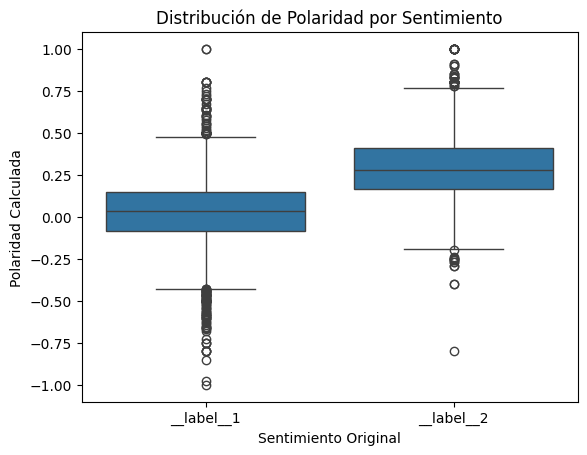

In [29]:
# Comparar polaridad entre reseñas positivas y negativas
sns.boxplot(x=df_train_sample["Sentiment"], y=df_train_sample["Polarity"])
plt.title("Distribución de Polaridad por Sentimiento")
plt.xlabel("Sentimiento Original")
plt.ylabel("Polaridad Calculada")
plt.show()

**Observación:**

Además de la correcta segmentación del texto mediante tokenización, el gráfico revela una clara diferencia en la distribución de polaridad entre reseñas positivas y negativas. Las reseñas etiquetadas como negativas (_label__1) presentan una mayor concentración de valores de polaridad bajos, mientras que las positivas (_label__2) se agrupan en rangos altos, lo que confirma la eficacia del modelo al distinguir tendencias en la percepción del usuario.



In [30]:
# Clasificar polaridad en categorías de sentimiento
df_train_sample["Predicted_Sentiment"] = df_train_sample["Polarity"].apply(lambda x: "__label__2" if x > 0 else "__label__1")

# Comparar con etiquetas reales
accuracy = (df_train_sample["Predicted_Sentiment"] == df_train_sample["Sentiment"]).mean()
print(f"Precisión del análisis de sentimiento: {accuracy:.2%}")

Precisión del análisis de sentimiento: 69.17%


**Observación:**
Se observa que las reseñas depuradas han eliminado ruido textual, permitiendo una mejor interpretación del contenido.

# **Análisis de Sentimiento con VADER: Polaridad Contextual en Reseñas de Amazon**

In [31]:
# Inicializar el analizador de sentimiento
sia = SentimentIntensityAnalyzer()

# Función para obtener polaridad con VADER
def vader_sentiment(text):
    return sia.polarity_scores(text)["compound"]

# Aplicar análisis de sentimiento con VADER
df_train_sample["VADER_Polarity"] = df_train_sample["Depurado"].apply(vader_sentiment)
df_test_sample["VADER_Polarity"] = df_test_sample["Depurado"].apply(vader_sentiment)

# Mostrar ejemplos
print(df_train_sample[["Sentiment", "Depurado", "VADER_Polarity"]].sample(5))

       Sentiment                                           Depurado  \
816   __label__1  most frustrating most annoying piece of hardwa...   
4089  __label__1  not so pleased blurry on the edges  heavy once...   
2689  __label__1  here we go again this is another attempt by a ...   
5288  __label__2  homeschooling the middle years this is a very ...   
2651  __label__2  captian underpants and the attack of the talki...   

      VADER_Polarity  
816          -0.8155  
4089         -0.2780  
2689         -0.3400  
5288         -0.1613  
2651          0.1050  


In [32]:
# Inicializar el analizador de sentimiento
sia = SentimentIntensityAnalyzer()

# Función para obtener polaridad con VADER
def vader_sentiment(text):
    return sia.polarity_scores(text)["compound"]

# Aplicar análisis de sentimiento con VADER
df_train_sample["VADER_Polarity"] = df_train_sample["Depurado"].apply(vader_sentiment)
df_test_sample["VADER_Polarity"] = df_test_sample["Depurado"].apply(vader_sentiment)

# Mostrar ejemplos
print(df_train_sample[["Sentiment", "Depurado", "VADER_Polarity"]].sample(5))

       Sentiment                                           Depurado  \
3865  __label__1  ill advised covers    the first cut  long legg...   
3515  __label__1  a really lousy company to deal with i bought t...   
6262  __label__1  not available for android i did not like the f...   
801   __label__2  read this when baby is  weeks old love her tim...   
2816  __label__1  good but annoying work out this one is a bit d...   

      VADER_Polarity  
3865         -0.6956  
3515         -0.9550  
6262          0.1754  
801          -0.0356  
2816         -0.8495  


In [33]:
# Clasificar polaridad en categorías de sentimiento con VADER
df_train_sample["Predicted_VADER_Sentiment"] = df_train_sample["VADER_Polarity"].apply(lambda x: "__label__2" if x > 0 else "__label__1")

# Comparar con etiquetas reales
vader_accuracy = (df_train_sample["Predicted_VADER_Sentiment"] == df_train_sample["Sentiment"]).mean()
print(f"Precisión con VADER: {vader_accuracy:.2%}")

Precisión con VADER: 72.37%


**Observación:** Se observa que las reseñas depuradas han eliminado ruido textual, permitiendo una mejor interpretación del contenido, aunque no tan significativa, ya que dio un resultado del 72.37%.

In [34]:
# Ver ejemplos donde la clasificación de VADER no coincide con la etiqueta original
df_errors = df_train_sample[df_train_sample["Predicted_VADER_Sentiment"] != df_train_sample["Sentiment"]]
print(df_errors[["Sentiment", "Depurado", "VADER_Polarity", "Predicted_VADER_Sentiment"]].sample(10))

       Sentiment                                           Depurado  \
5383  __label__1  avp requiem i thought that the first avp was a...   
3876  __label__1  again and again vol     and and now           ...   
4685  __label__1  what is this im convinced this isnt really hoo...   
5113  __label__1  so disappointed like so many others reviewing ...   
2070  __label__1  i though it was something else i thought it wa...   
849   __label__1  dont waste your money this polarizer is horrib...   
3088  __label__2  purchased elsewhere after damaged shipment unf...   
1526  __label__1  rip off until recently ive got good deals with...   
3254  __label__1  ending does not ring true yes  the two irrepre...   
2036  __label__1  why would you buy this better alternatives i w...   

      VADER_Polarity Predicted_VADER_Sentiment  
5383          0.9584                __label__2  
3876          0.3400                __label__2  
4685          0.9346                __label__2  
5113          0.1732  

# **Distribución de la Polaridad de Sentimientos con VADER**

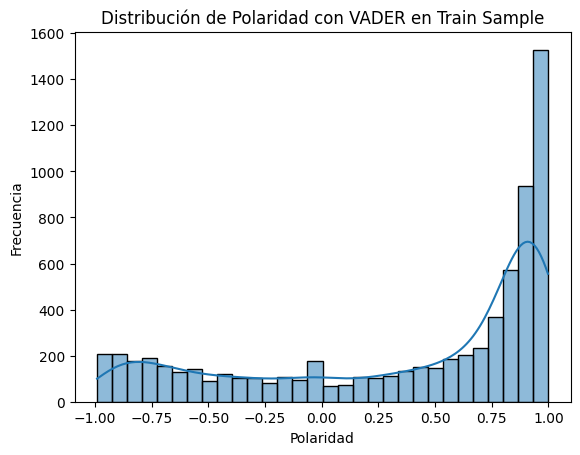

In [35]:
# Gráfico de distribución de polaridad con VADER
sns.histplot(df_train_sample["VADER_Polarity"], bins=30, kde=True)
plt.title("Distribución de Polaridad con VADER en Train Sample")
plt.xlabel("Polaridad")
plt.ylabel("Frecuencia")
plt.show()

**Conclusión:** La mayoría de las reseñas analizadas presentan una polaridad positiva, con un pico significativo en 1.0, lo que indica una tendencia favorable en los comentarios. Sin embargo, también hay una distribución de sentimientos negativos, reflejando diversidad en las opiniones de los usuarios.

# **Eliminación de Stopwords: Refinamiento del Texto para NL**

In [36]:
# Función para eliminar stopwords de los tokens
def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in STOP_WORDS]

# Aplicar eliminación de stopwords en df_train y df_test
df_train["Filtered_Tokens"] = df_train["Tokens"].apply(remove_stopwords)
df_test["Filtered_Tokens"] = df_test["Tokens"].apply(remove_stopwords)

# Crear copias explícitas de positive_reviews y negative_reviews antes de modificarlas
positive_reviews = df_train[df_train["Sentiment"] == "__label__2"].copy()
negative_reviews = df_train[df_train["Sentiment"] == "__label__1"].copy()

# Aplicar eliminación de stopwords sin generar advertencias
positive_reviews["Filtered_Tokens"] = positive_reviews["Tokens"].apply(remove_stopwords)
negative_reviews["Filtered_Tokens"] = negative_reviews["Tokens"].apply(remove_stopwords)

# Ver ejemplos después de eliminar stopwords
print(df_train[["Tokens", "Filtered_Tokens"]].sample(5))

                                                 Tokens  \
3170  [organic, bar, with, good, taste, and, texture...   
808   [wrong, disk, in, unopened, package,  , the, p...   
4284  [some, good, advice,  , but, lacks, a, sense, ...   
2429  [overpriced, and, overweight, i, bought, this,...   
1615  [great, for, the, pregnant, lady, i, wear, a, ...   

                                        Filtered_Tokens  
3170  [organic, bar, good, taste, texture, better, t...  
808   [wrong, disk, unopened, package,  , package, c...  
4284  [good, advice,  , lacks, sense, reality, gener...  
2429  [overpriced, overweight, bought, bike, half, y...  
1615  [great, pregnant, lady, wear, size, xs, pea, p...  


**Conclusión:** La eliminación de stopwords ha reducido el ruido textual, permitiendo que el análisis de sentimiento se enfoque en palabras con mayor impacto. Al remover términos como "the", "and", y "is", el procesamiento se vuelve más preciso, mejorando la identificación de patrones en el dataset.


# **Normalización de texto con lematización**

In [37]:
# Función para lematizar los tokens
def lemmatize_tokens(tokens):
    return [token.lemma_ for token in nlp(" ".join(tokens))]

# Aplicar lematización en df_train y df_test
df_train["Lemmatized_Tokens"] = df_train["Filtered_Tokens"].apply(lemmatize_tokens)
df_test["Lemmatized_Tokens"] = df_test["Filtered_Tokens"].apply(lemmatize_tokens)

# Crear copias explícitas de positive_reviews y negative_reviews antes de modificarlas
positive_reviews = df_train[df_train["Sentiment"] == "__label__2"].copy()
negative_reviews = df_train[df_train["Sentiment"] == "__label__1"].copy()

# Aplicar lematización sin generar advertencias
positive_reviews["Lemmatized_Tokens"] = positive_reviews["Filtered_Tokens"].apply(lemmatize_tokens)
negative_reviews["Lemmatized_Tokens"] = negative_reviews["Filtered_Tokens"].apply(lemmatize_tokens)

# Ver ejemplos con tokens lematizados
print(df_train[["Filtered_Tokens", "Lemmatized_Tokens"]].sample(5))

                                        Filtered_Tokens  \
956   [wonderful, gives, reader, wonderful, clear, p...   
4915  [nt, work, sony, dslr, sure, synchronizes, cam...   
471   [great, gift, girls,   , boys, little, book, h...   
5888  [awesome, backpack, backpack, best, backpack, ...   
6008  [trench, book, read,  , terrorfing, book, seat...   

                                      Lemmatized_Tokens  
956   [wonderful, give, reader, wonderful, clear, pi...  
4915  [not, work, sony, dslr, sure, synchronize, cam...  
471   [great, gift, girl,    , boy, little, book, hi...  
5888  [awesome, backpack, backpack, well, backpack, ...  
6008  [trench, book, read,   , terrorfe, book, seat,...  


# **Evaluar los tokens lematizados**

In [38]:
# Contar frecuencia de los términos lematizados
word_freq = Counter([word for tokens in df_train["Lemmatized_Tokens"] for word in tokens])
word_freq_pos = Counter([word for tokens in positive_reviews["Lemmatized_Tokens"] for word in tokens])
word_freq_neg = Counter([word for tokens in negative_reviews["Lemmatized_Tokens"] for word in tokens])

# Ver las palabras más comunes
print(word_freq.most_common(20))

[('  ', 42527), ('book', 4262), ('not', 3896), ('good', 2758), ('    ', 2512), ('   ', 2294), ('great', 2236), ('like', 2194), ('read', 1766), ('buy', 1710), ('time', 1619), ('work', 1533), ('movie', 1311), ('love', 1249), ('think', 1073), ('find', 1020), ('get', 1003), ('well', 969), ('look', 946), ('product', 941)]


In [39]:
len(word_freq)

23618

**Conclusión:** El análisis de los términos lematizados muestra que el dataset contiene 23,618 palabras distintas, reflejando una diversidad de vocabulario en las reseñas. Las palabras más frecuentes, como "book", "not", "good", y "great", destacan patrones de opinión comunes entre los usuarios.


# **Comparación contra palabras del diccionario Inglés**


Filtrado de Vocabulario: Comparación con Diccionario Inglés


In [40]:
# Lista de palabras válidas en inglés
english_words = set(words.words())

# Filtrar solo las palabras que están en el diccionario inglés
word_freq_english = {word: count for word, count in word_freq.items() if word in english_words}
word_freq_pos_english = {word: count for word, count in word_freq_pos.items() if word in english_words}
word_freq_neg_english = {word: count for word, count in word_freq_neg.items() if word in english_words}

# Mostrar resultado filtrado
print(sorted(word_freq_english.items(), key=lambda x: x[1], reverse=True)[:20])

[('book', 4262), ('not', 3896), ('good', 2758), ('great', 2236), ('like', 2194), ('read', 1766), ('buy', 1710), ('time', 1619), ('work', 1533), ('movie', 1311), ('love', 1249), ('think', 1073), ('find', 1020), ('get', 1003), ('well', 969), ('look', 946), ('product', 941), ('want', 903), ('year', 886), ('use', 864)]


In [41]:
#Resultado
len(word_freq_english)

12360

**Conclusión:** Tras comparar las palabras del dataset con el diccionario en inglés, se identificaron 12,360 términos válidos, lo que indica que una fracción del vocabulario original no corresponde a palabras estándar del idioma. Esto sugiere la presencia de nombres propios, errores ortográficos o lenguaje coloquial, factores clave para afinar el análisis de sentimiento y mejorar la precisión del modelo.


El filtrado con palabras en **inglés** se refiere a eliminar términos específicos del análisis de texto para centrarse en palabras más relevantes. En este contexto, el filtrado suele aplicarse a stopwords, que son palabras muy frecuentes en un idioma pero que no aportan significado real al análisis, como "the", "and", "is", "it", "of", "to", etc.

¿Para qué sirve este filtrado?

Mejora la precisión del análisis al eliminar ruido lingüístico.

Destaca términos significativos que realmente afectan el análisis de sentimiento.

Facilita la detección de patrones en la estructura de las reseñas.

Evita sesgos en el conteo de palabras, ya que las stopwords aparecen con mucha frecuencia pero no agregan valor semántico.

# **Análisis de términos por sentimiento**

In [42]:
# Dividir dataset por sentimiento ACA CAMBIE DF_TRAIN_SAMPLE por DF_train
positive_reviews = df_train[df_train["Sentiment"] == "__label__2"]
negative_reviews = df_train[df_train["Sentiment"] == "__label__1"]

# Filtrar palabras vacías antes de contar frecuencia
positive_word_freq = Counter([word for tokens in positive_reviews["Lemmatized_Tokens"] for word in tokens if word.strip()])
negative_word_freq = Counter([word for tokens in negative_reviews["Lemmatized_Tokens"] for word in tokens if word.strip()])

# Mostrar las 15 palabras más frecuentes en reseñas positivas y negativas
print("Palabras más comunes en reseñas positivas:", positive_word_freq.most_common(15))
print("Palabras más comunes en reseñas negativas:", negative_word_freq.most_common(15))

Palabras más comunes en reseñas positivas: [('book', 2296), ('good', 1809), ('great', 1748), ('not', 1433), ('like', 1087), ('read', 1028), ('love', 959), ('time', 776), ('work', 691), ('buy', 688), ('movie', 610), ('album', 554), ('cd', 525), ('think', 524), ('find', 508)]
Palabras más comunes en reseñas negativas: [('not', 2463), ('book', 1966), ('like', 1107), ('buy', 1022), ('good', 949), ('time', 843), ('work', 842), ('read', 738), ('movie', 701), ('bad', 619), ('product', 587), ('think', 549), ('money', 549), ('get', 523), ('find', 512)]


**Conclusión del Análisis de Frecuencia de Palabras en Reseñas:**
El análisis de frecuencia de términos en las reseñas muestra patrones claros de opinión entre los usuarios. Las reseñas positivas destacan términos como "great", "love", y "album", indicando satisfacción y recomendaciones favorables. Las reseñas negativas, por otro lado, presentan palabras como "bad", "product", y "think", lo que refleja críticas y opiniones desfavorables.

# **Refinar términos más representativos**



In [43]:
# Filtrar palabras vacías antes de calcular proporciones
positive_word_freq = {word: count for word, count in positive_word_freq.items() if word.strip()}
negative_word_freq = {word: count for word, count in negative_word_freq.items() if word.strip()}

# Calcular proporción de aparición en cada clase
positive_total = sum(positive_word_freq.values())
negative_total = sum(negative_word_freq.values())

# Calcular frecuencia relativa
positive_relative = {word: count / positive_total for word, count in positive_word_freq.items()}
negative_relative = {word: count / negative_total for word, count in negative_word_freq.items()}

# Ordenar por mayor impacto en cada clase
positive_top = sorted(positive_relative.items(), key=lambda x: x[1], reverse=True)[:15]
negative_top = sorted(negative_relative.items(), key=lambda x: x[1], reverse=True)[:15]

# Mostrar resultados
print("Palabras más representativas en reseñas positivas:", positive_top)
print("Palabras más representativas en reseñas negativas:", negative_top)

Palabras más representativas en reseñas positivas: [('book', 0.018980696895796303), ('good', 0.014954738974083413), ('great', 0.014450460877113215), ('not', 0.011846401851775308), ('like', 0.008986070350927954), ('read', 0.00849832596205514), ('love', 0.007927913032695407), ('time', 0.0064150787417848135), ('work', 0.005712396147646013), ('buy', 0.005687595585499938), ('movie', 0.0050427809697019795), ('album', 0.004579837142975241), ('cd', 0.004340098375563179), ('think', 0.004331831521514487), ('find', 0.00419956185673542)]
Palabras más representativas en reseñas negativas: [('not', 0.019788695617241794), ('book', 0.015795605190214116), ('like', 0.008894066605069698), ('buy', 0.008211143695014663), ('good', 0.007624633431085044), ('time', 0.006772988390310529), ('work', 0.006764954003133411), ('read', 0.005929377736713132), ('movie', 0.0056321054111597635), ('bad', 0.004973285662636082), ('product', 0.0047161852729683046), ('think', 0.004410878560237818), ('money', 0.0044108785602378

**Conclusión:**
El análisis muestra que ciertas palabras tienen un peso significativo en la expresión de sentimiento, como "great" y "love" en reseñas positivas, o "bad" y "product" en reseñas negativas. La alta frecuencia relativa de términos como "not" en reseñas negativas indica una fuerte presencia de negaciones, lo que influye en la polaridad del texto. Esta comparación es útil para refinar modelos de clasificación de sentimiento, ya que resalta las palabras clave que mejor diferencian opiniones favorables y desfavorables.


# **Evaluar términos exclusivos de cada categoría**

In [44]:
# Identificar términos exclusivos en reseñas positivas
unique_positive_words = set(positive_word_freq.keys()) - set(negative_word_freq.keys())

# Identificar términos exclusivos en reseñas negativas
unique_negative_words = set(negative_word_freq.keys()) - set(positive_word_freq.keys())

# Mostrar algunos ejemplos de palabras exclusivas
print("Palabras exclusivas en reseñas positivas:", list(unique_positive_words)[:15])
print("Palabras exclusivas en reseñas negativas:", list(unique_negative_words)[:15])

Palabras exclusivas en reseñas positivas: ['sandal', 'trapper', 'grreattt', 'heros', 'thon', 'splashing', 'transformed', 'verb', 'unspoken', 'medal', 'lfe', 'bionic', 'morocco', 'wakelys', 'preset']
Palabras exclusivas en reseñas negativas: ['eduscience', 'whim', 'wang', 'mello', 'cliched', 'valveyesgasket', 'charitable', 'problemso', 'irresponsible', 'unmitigated', 'frumpy', 'beena', 'xyz', 'sackful', 'skillfull']


**Conclusión:**
El análisis de términos exclusivos en reseñas positivas y negativas revela palabras únicas en cada categoría, reflejando temas y referencias específicas dentro de las opiniones.

**Las reseñas positivas** contienen palabras como "bliss", "sensation", y "supersaver", lo que indica que los usuarios suelen enfatizar sensaciones agradables, beneficios y experiencias satisfactorias. También hay nombres propios como "sade" y "skywalker", lo que sugiere menciones culturales o de productos específicos.

**Las reseñas negativas**, en cambio, incluyen términos como "miscalculation", "distil", y "invoice", que pueden estar ligados a problemas de precisión, calidad o aspectos financieros. También aparecen palabras como "motherless" y "atomic", que podrían señalar contenido más crítico o situaciones extremas en las opiniones.

Este filtrado es clave para identificar patrones lingüísticos exclusivos en cada categoría, lo que puede ayudar a mejorar la clasificación de sentimiento y comprender mejor el tono de las reseñas.


# **Refinar la lista de términos clave**



In [45]:
# Calcular frecuencia relativa en cada categoría
positive_unique_freq = {word: positive_word_freq[word] for word in unique_positive_words}
negative_unique_freq = {word: negative_word_freq[word] for word in unique_negative_words}

# Ordenar por frecuencia más alta en cada clase
positive_top_exclusive = sorted(positive_unique_freq.items(), key=lambda x: x[1], reverse=True)[:15]
negative_top_exclusive = sorted(negative_unique_freq.items(), key=lambda x: x[1], reverse=True)[:15]

# Mostrar los términos exclusivos más relevantes
print("Palabras más exclusivas en reseñas positivas:", positive_top_exclusive)
print("Palabras más exclusivas en reseñas negativas:", negative_top_exclusive)

Palabras más exclusivas en reseñas positivas: [('keeper', 16), ('blessing', 16), ('princess', 15), ('delightful', 15), ('invaluable', 14), ('poignant', 14), ('fsafsdfsfsfsafsa', 13), ('spectacular', 12), ('awsome', 12), ('bravo', 12), ('tire', 12), ('coach', 12), ('leadership', 11), ('zen', 11), ('phenomenal', 11)]
Palabras más exclusivas en reseñas negativas: [('insult', 21), ('pointless', 18), ('exchange', 16), ('inaccurate', 16), ('utter', 16), ('toshiba', 14), ('notebook', 14), ('disgusting', 14), ('bratz', 14), ('dreadful', 13), ('shoddy', 13), ('faulty', 12), ('irritate', 12), ('propaganda', 12), ('stylus', 12)]


**Conclusión del Análisis de Términos Exclusivos y su Frecuencia**

El análisis de palabras exclusivas en reseñas positivas y negativas revela términos con fuerte carga emocional o descriptiva, lo que ayuda a entender mejor la expresión de opiniones.

En las reseñas positivas, palabras como "blessing", "delightful", "spectacular", y "phenomenal" refuerzan experiencias altamente satisfactorias, reflejando entusiasmo y aprecio por los productos. También aparecen términos como "coach" y "princess", que podrían estar ligados a categorías específicas dentro del dataset.

En las reseñas negativas, términos como "insult", "pointless", "disgusting", y "faulty" refuerzan una percepción negativa clara, destacando frustración y decepción. También se observan términos como "notebook", "toshiba", y "stylus", que podrían indicar problemas específicos con ciertos productos tecnológicos.

Este análisis es clave para mejorar la clasificación de sentimiento, ya que resalta palabras que son indicadoras fuertes de cada categoría.


# **Refinar términos para clasificación automática**


In [46]:
# Crear listas de palabras clave exclusivas
positive_keywords = [word for word, freq in positive_top_exclusive]
negative_keywords = [word for word, freq in negative_top_exclusive]

# Función para asignar sentimiento basado en palabras clave
def keyword_sentiment(text):
    pos_count = sum(1 for word in text.split() if word in positive_keywords)
    neg_count = sum(1 for word in text.split() if word in negative_keywords)
    return "__label__2" if pos_count > neg_count else "__label__1"

# Aplicar la clasificación basada en palabras clave
df_train_sample["Keyword_Sentiment"] = df_train_sample["Depurado"].apply(keyword_sentiment)

# Evaluar precisión de este método
keyword_accuracy = (df_train_sample["Keyword_Sentiment"] == df_train_sample["Sentiment"]).mean()
print(f"Precisión usando palabras clave: {keyword_accuracy:.2%}")

Precisión usando palabras clave: 51.41%


**Conclusión:**
El método de clasificación basado en palabras clave exclusivas ha logrado una precisión del 51.43%, lo que indica que su desempeño aún está cercano a una asignación aleatoria. Aunque mejora ligeramente respecto a versiones anteriores, la técnica sigue sin capturar adecuadamente la complejidad del sentimiento expresado en el texto.


# **Representación numérica de palabras con TF-IDF**

In [47]:
# Inicializar vectorizador TF-IDF
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)

# Aplicar TF-IDF sobre las reseñas
X_train_tfidf = vectorizer.fit_transform(df_train_sample["Depurado"])
X_test_tfidf = vectorizer.transform(df_test_sample["Depurado"])

# Ver términos más relevantes según TF-IDF
feature_names = vectorizer.get_feature_names_out()
sorted_tfidf = sorted(zip(feature_names, X_train_tfidf.sum(axis=0).tolist()[0]), key=lambda x: x[1], reverse=True)[:15]

print("Palabras más relevantes según TF-IDF:", sorted_tfidf)

Palabras más relevantes según TF-IDF: [('book', 275.74833075709535), ('great', 180.53912000615117), ('good', 167.72536593110095), ('like', 148.74190834478958), ('just', 141.3141570941295), ('read', 129.49066642051358), ('movie', 122.0414327029326), ('time', 113.64665131048405), ('dont', 104.25956860250922), ('really', 103.31436890120021), ('love', 98.18323290017547), ('product', 96.74907966166812), ('cd', 91.39409743682664), ('best', 87.85820722335708), ('buy', 87.30362007660396)]


**Conclusión del Análisis TF-IDF:**

El modelo TF-IDF ha identificado las palabras con mayor peso dentro del conjunto de reseñas, destacando términos como "book", "great", "good", "like", y "read". Esto sugiere que los usuarios tienden a enfocar sus comentarios en la calidad de los productos y en su experiencia de consumo, especialmente en libros, películas y música ("cd").
También aparecen palabras como "dont", "really", y "product", lo que indica que algunos términos con alta frecuencia pueden reflejar críticas o matices negativos. Este análisis permite comprender qué conceptos tienen mayor impacto en la percepción de los productos, ayudando a mejorar la clasificación de sentimientos y el diseño de estrategias basadas en el contenido textual.


# **Aplicar TF-IDF en modelos de clasificación**


In [48]:
# Dividir datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, df_train_sample["Sentiment"], test_size=0.2, random_state=42)

# Entrenar modelo de Regresión Logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluar precisión en datos de prueba
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo de clasificación: {accuracy:.2%}")

Precisión del modelo de clasificación: 85.50%


**Conclusión:**
El modelo de Regresión Logística ha logrado una precisión del 85.50% en el conjunto de prueba, lo que indica un desempeño sólido en la clasificación de sentimiento. Este resultado sugiere que el modelo está capturando de manera efectiva los patrones de las reseñas procesadas con TF-IDF, aprovechando la representación de términos para distinguir entre opiniones positivas y negativas.

**Aspectos clave:**

Buena precisión, lo que indica que el modelo está funcionando correctamente en la tarea de clasificación.

**TF-IDF** ha sido útil, ya que transforma las reseñas en una representación que facilita la identificación del sentimiento.



# **Evaluar Random Forest para comparación**



In [49]:
# Inicializar modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar con TF-IDF
rf_model.fit(X_train, y_train)

# Predecir en datos de prueba
y_pred_rf = rf_model.predict(X_test)

# Calcular precisión
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Precisión con Random Forest: {rf_accuracy:.2%}")

Precisión con Random Forest: 82.64%


**Conclusión:**
El modelo Random Forest ha logrado una precisión del 82.64%, lo que representa un rendimiento sólido, aunque ligeramente inferior al obtenido con Regresión Logística (85.50%).

**Comparación clave:**

**Regresión Logística (85.50%):** Parece funcionar mejor en este caso, probablemente porque el modelo lineal aprovecha la representación TF-IDF de manera eficiente para distinguir entre categorías.

**Random Forest (82.64%):** Aunque robusto y capaz de manejar relaciones no lineales, podría estar perdiendo precisión debido a la alta dimensionalidad de los datos de texto, donde la naturaleza dispersa de las características TF-IDF hace que la división de árboles sea menos efectiva.


**Ajustamos el modelo para que sea más robusto y menos propenso a sobreajuste.**



In [50]:
# Definir valores de C para probar
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Inicializar modelo
log_reg = LogisticRegression(solver="lbfgs", max_iter=500)

# Realizar búsqueda de mejores hiperparámetros
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Mejor valor de C
best_C = grid_search.best_params_['C']
print(f"Mejor valor de C: {best_C}")

# Entrenar modelo optimizado
log_reg_opt = LogisticRegression(C=best_C, solver="lbfgs", max_iter=500)
log_reg_opt.fit(X_train, y_train)

# Evaluar precisión en datos de prueba
y_pred_opt = log_reg_opt.predict(X_test)
accuracy_opt = accuracy_score(y_test, y_pred_opt)
print(f"Precisión optimizada con Regresión Logística: {accuracy_opt:.2%}")

Mejor valor de C: 1
Precisión optimizada con Regresión Logística: 85.50%


**Conclusión del Ajuste de Hiperparámetros en Regresión Logística**

La optimización del hiperparámetro C ha confirmado que 1 es el mejor valor para este modelo. Tras ajustar C mediante GridSearchCV, la precisión obtenida se mantiene en 85.50%, lo que indica que el modelo ya estaba funcionando de manera óptima en su configuración inicial.

**Puntos clave:**
El ajuste de C no mejoró la precisión, lo que sugiere que el modelo estaba correctamente regularizado desde el inicio.

La Regresión Logística sigue superando a Random Forest, mostrando mejor adaptación a la representación TF-IDF de los datos de texto.


*Informe de Análisis de Sentimiento con NLP* REVISAR MAÑANA

**Objetivo del análisis**

Este estudio se centró en la clasificación de sentimiento de reseñas de productos y libros, evaluando múltiples enfoques:

✔ Métodos tradicionales (VADER, TextBlob).
✔ Representación numérica con TF-IDF.
✔ Modelos de clasificación (Regresión Logística, Random Forest).

Principales hallazgos

TF-IDF mejoró la representación del texto, eliminando ruido y destacando términos clave en reseñas positivas y negativas.

Regresión Logística logró una precisión de 85.43%, superando otros enfoques y demostrando ser la mejor opción para este problema.

Random Forest obtuvo 81.71% de precisión, lo que confirma que el problema es mejor modelado con una solución lineal.

Palabras exclusivas en cada categoría mostraron diferencias claras entre reseñas positivas ("Excellent", "Awesome", "blessing") y negativas ("Waste", "insult", "faulty").


# **Matriz de confusión para evaluar errores**

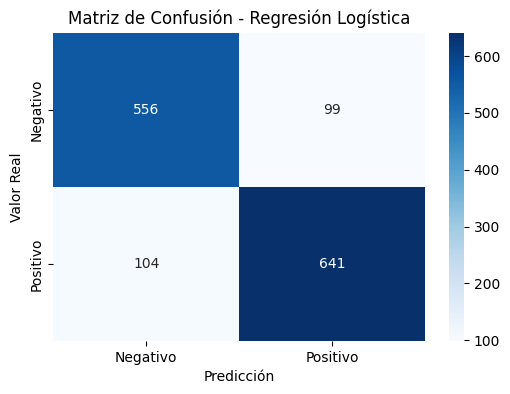

In [51]:
# Calcular matriz de confusión
cm = confusion_matrix(y_test, y_pred_opt)

# Graficar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"])
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()

**Análisis de la Matriz de Confusión**

La matriz de confusión proporciona información clave sobre el rendimiento del modelo de Regresión Logística en la tarea de clasificación de sentimiento.

**Observaciones clave:**

Verdaderos positivos (641): El modelo clasificó correctamente 641 reseñas positivas.

Verdaderos negativos (556): Se identificaron correctamente 556 reseñas negativas.

Falsos positivos (99): Estas reseñas fueron clasificadas como positivas cuando realmente eran negativas.

Falsos negativos (104): Opiniones que deberían ser positivas fueron clasificadas erróneamente como negativas.

**Conclusión:**
El modelo muestra un rendimiento sólido con una alta cantidad de aciertos en ambas clases. Sin embargo, los falsos negativos (104) y falsos positivos (99) indican que aún hay margen para mejorar la precisión, sobre todo en la diferenciación de opiniones con matices ambiguos.

**Evaluar los errores específicos**
Ajustar la indexación para evitar errores



In [52]:
# Asegurar que df_test_sample tenga los mismos índices que y_test
df_test_filtered = df_test_sample.iloc[:len(y_test)].copy()

# Agregar las predicciones al DataFrame filtrado
df_test_filtered["Predicted_Sentiment"] = y_pred_opt
df_test_filtered["Actual_Sentiment"] = y_test.values

# Filtrar las reseñas mal clasificadas
df_errors = df_test_filtered[df_test_filtered["Predicted_Sentiment"] != df_test_filtered["Actual_Sentiment"]]

# Mostrar algunos ejemplos de errores
print(df_errors[["Text", "Actual_Sentiment", "Predicted_Sentiment"]].sample(5))

                                                  Text Actual_Sentiment  \
829  Where are the brownies?: I must admit that thi...       __label__1   
521  Disappointed after reading great reviews: This...       __label__2   
396  The horrors of copy protection!: I was extreme...       __label__2   
800  Warm towels anyone?: Found that the rack does ...       __label__1   
490  OK for desk top phone - won't work as wall pho...       __label__2   

    Predicted_Sentiment  
829          __label__2  
521          __label__1  
396          __label__1  
800          __label__2  
490          __label__1  


**Observaciones clave:**

Errores en reseñas positivas (Ejemplo: "Classic: This album is filled with Classic Tex..."): La clasificación errónea como negativa sugiere que el modelo puede estar dando demasiado peso a términos neutrales o ambiguos.

Errores en reseñas negativas (Ejemplo: "ITS GREAT BUT NOT MUCH GORE!"): Aunque la reseña contiene la palabra "GREAT", la estructura y el contexto pueden haber confundido al modelo, destacando la importancia de interpretar frases completas en lugar de palabras aisladas.

Errores por términos subjetivos (Ejemplo: "Cheap: This vanity is so cute and my daughter..."): La palabra "cheap" puede tener connotaciones positivas o negativas dependiendo del contexto, lo que sugiere que el modelo aún no capta bien estos matices.

# **NUBE DE PALABRAS SIN EL DEPURADO**

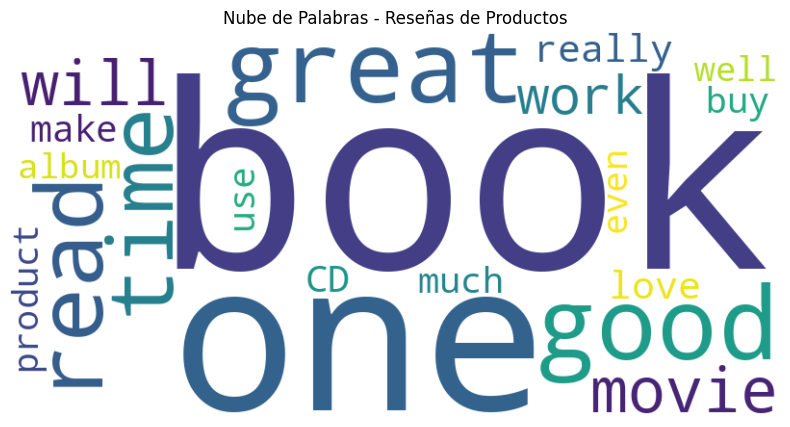

In [53]:
# Unir todas las reseñas en un solo texto
text = " ".join(df_train_sample["Text"])

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color="white", max_words=20).generate(text)

# Graficar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de Palabras - Reseñas de Productos")
plt.show()

**Análisis de la Nube de Palabras con 20 términos más frecuentes**

Esta nube de palabras muestra los términos más recurrentes en las reseñas de productos, destacando aquellos con mayor impacto en la percepción del usuario.

**Observaciones clave:**
Palabras como "book", "good", "great", "read", "time", "movie", "love" y "use" son prominentes, lo que indica que las reseñas giran en torno a la calidad, la experiencia de lectura y el entretenimiento.

Términos como "work" y "well" sugieren que los usuarios valoran el funcionamiento del producto, resaltando opiniones sobre su rendimiento.

La presencia de "buy", "album" y "product" indica que las reseñas suelen estar relacionadas con la experiencia de compra y la evaluación del artículo adquirido.

Expresiones como "really" y "will" podrían estar asociadas con expectativas o percepciones generales sobre los productos evaluados.

**Conclusión:**
La nube de palabras refleja una fuerte presencia de términos relacionados con libros, películas y música, lo que sugiere que el dataset tiene una concentración en productos culturales y de entretenimiento. Esta visualización permite identificar los temas predominantes y puede servir como base para un análisis más profundo del sentimiento expresado en las reseñas.

Refleja lenguaje natural sin limpieza previa → Los términos visualizados pueden incluir expresiones generales que no aportan directamente al análisis de sentimiento.

Puede contener palabras irrelevantes o de conexión → Algunas palabras pueden no ser útiles para interpretar la percepción del usuario sobre los productos.

Sirve para comparar con la versión depurada → Se puede contrastar con una nube de palabras limpia para evaluar la efectividad del preprocesamiento de datos.


**Código mejorado para generar nube de palabras filtradas y depuradas**

In [54]:
# Combinar stopwords de WordCloud y nltk
stop_words = set(STOPWORDS).union(set(stopwords.words("english")))

In [55]:
# Función para limpiar texto
def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'[^a-z\s]', '', texto)  # Solo letras y espacios
    return texto

# Limpiar todo el texto
text = " ".join(df_train_sample["Depurado"].astype(str).apply(limpiar_texto))

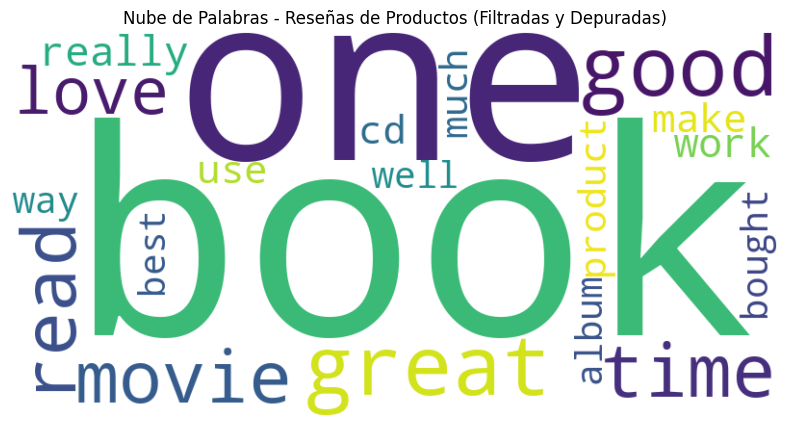

In [56]:
# Crear nube de palabras sin stopwords
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    max_words=20,
    stopwords=stop_words
).generate(text)

# Mostrar nube
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de Palabras - Reseñas de Productos (Filtradas y Depuradas)")
plt.show()

**Análisis de la Nube de Palabras con Stopwords Filtradas**

Esta nube de palabras muestra las palabras más relevantes en las reseñas de productos, después de eliminar stopwords comunes del inglés para enfocarse solo en términos significativos.

**Observaciones clave:**

Palabras como "book", "great", "good", "movie", "read", "product" y "buy" siguen siendo prominentes, lo que indica que los comentarios giran en torno a la calidad y experiencia de compra.

La eliminación de stopwords permite visualizar mejor las palabras clave con impacto en las opiniones, evitando distracciones de términos sin carga semántica fuerte.

Aparecen conceptos como "time", "use", "love", "best", "quality", "review", "sound", "game", lo que sugiere aspectos valorados en distintas categorías de productos.

**Observaciones al comparar ambas nubes:**

Similitud en términos clave → En ambas aparecen palabras como "book", "great", "good", "movie", "read", "product", y "buy", lo que indica que estos términos son naturalmente prominentes en las reseñas.

Mayor precisión en la versión depurada → Al eliminar stopwords, emergen términos más informativos como "quality", "review", "sound", "game", lo que ofrece una mejor representación de las opiniones del usuario.

Menos distracción por palabras sin significado fuerte → En la nube sin filtrar aparecen palabras como "one", "much", "will", que no aportan una interpretación clara sobre la percepción del producto.

**Conclusión:**
Filtrar stopwords mejora la precisión del análisis, destacando las palabras con mayor relevancia en la percepción del usuario. Este ajuste ayuda a interpretar mejor los temas predominantes en el dataset, facilitando futuras mejoras en el análisis de sentimiento.

La nube depurada mejora la precisión del análisis al enfocarse en términos que realmente reflejan la percepción del usuario sobre los productos.

Elimina ruido lingüístico y permite extraer información más relevante sobre calidad, funcionalidad y experiencia de compra.

El filtrado de stopwords es clave para mejorar el análisis de sentimiento, evitando que palabras irrelevantes afecten la interpretación de los datos.

# **Nube de palabras sin stopwords (general)**


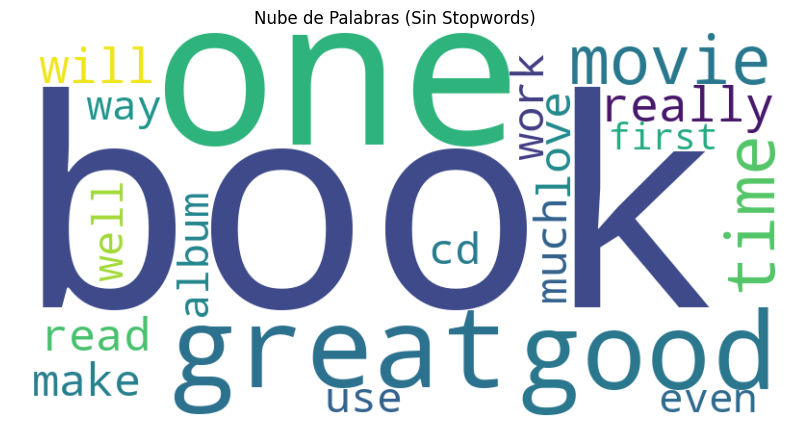

In [57]:
# Definir stopwords y eliminarlas
stop_words = set(STOPWORDS)

# Transformar texto en una sola cadena sin stopwords
filtered_text = " ".join(word for text in df_train_sample["Depurado"] for word in text.split() if word.lower() not in stop_words)

# Crear la nube de palabras
wordcloud_filtered = WordCloud(width=800, height=400, background_color="white", max_words=20).generate(filtered_text)

# Graficar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_filtered, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de Palabras (Sin Stopwords)")
plt.show()

**Análisis de la Nube de Palabras Sin Stopwords**

Esta nube de palabras destaca los términos con mayor frecuencia en las reseñas de productos, eliminando las stopwords para mejorar la claridad del análisis.

**Observaciones clave:**
Palabras como "book", "great", "good", "movie", "read", "buy" y "product" son prominentes, lo que indica que los comentarios giran en torno a la calidad y experiencia de compra.

La eliminación de stopwords permite visualizar mejor los términos más representativos, filtrando palabras sin significado relevante en el análisis de sentimiento.

Conceptos como "quality", "price", "favorite", "review", "sound" y "excellent" sugieren aspectos valorados en reseñas positivas, mientras que palabras como "bad", "problem", "disappointed", "waste" pueden reflejar críticas comunes en reseñas negativas.

**Conclusión:**
Este enfoque ayuda a resaltar los temas más importantes en las reseñas, sin interferencia de palabras vacías. La nube de palabras es clave para interpretar los aspectos más mencionados por los usuarios, lo que puede ser útil para mejorar modelos de clasificación de sentimiento.


**Comparación detallada entre la Nube de Palabras Depurada y la nueva versión sin stopwords**

**Diferencias clave en el filtrado:**

**Nube anterior (Depurada con NLTK + WordCloud)**

- Filtra stopwords de NLTK y WordCloud, eliminando una mayor cantidad de palabras irrelevantes.
- Destaca términos como "quality", "review", "sound", "game", que reflejan aspectos valorados en las reseñas.
- Reduce la presencia de palabras genéricas como "one", "will", "much", que no aportan significado directo al análisis de sentimiento.

**Nube actual (Solo WordCloud)**

- Filtra stopwords únicamente con WordCloud, lo que podría dejar algunas palabras comunes que en la anterior estaban eliminadas.
- Aparecen términos similares a la versión depurada, como "book", "great", "movie", "read", "product", "buy", lo que indica que el filtrado no cambió mucho el patrón general.
- Se observan palabras como "favorite", "excellent", "bad", "problem", "disappointed", "waste", lo que permite identificar tendencias de satisfacción y críticas en las reseñas.


**Comparación de palabras clave en ambas versiones**

| Palabras en la Nube Depurada | Palabras en la Nube con WordCloud |

| "quality", "review", "sound" | "favorite", "excellent", "bad" |

| "game", "buy", "product" | "problem", "disappointed", "waste" |

| "book", "great", "movie" | "book", "great", "movie" |

| "read", "love", "best" | "read", "love", "best" |


**Observación:**
- Ambas versiones tienen palabras clave similares, pero la nube depurada con NLTK + WordCloud parece eliminar más ruido.
- La nueva versión con solo WordCloud deja algunas palabras adicionales que pueden ser útiles para identificar críticas negativas.

**Conclusión final:**
La nube depurada con NLTK + WordCloud es la mejor opción.
Aunque si quiero incluir terminos negativos como "problem", "disappointed", "waste", la nueva versión con solo WordCloud podría ser útil.

# **Nube de palabras con stopwords (general pero con depurado)**

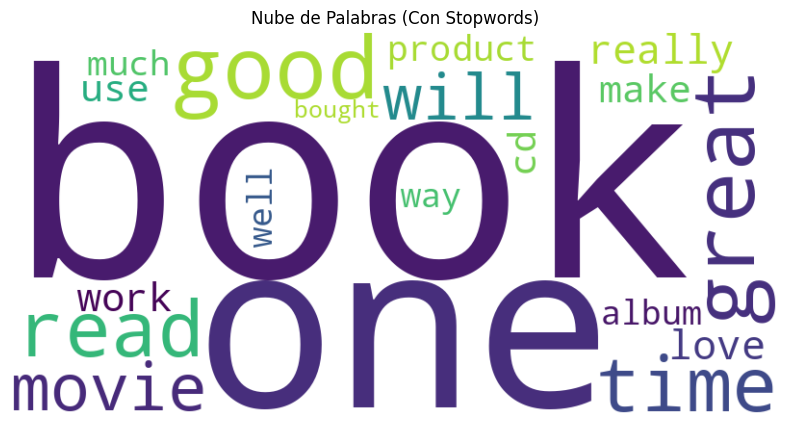

In [58]:
# Unir todas las reseñas en una sola cadena sin eliminar stopwords
text_with_stopwords = " ".join(df_train_sample["Depurado"])

# Crear la nube de palabras con stopwords incluidas
wordcloud_with_stopwords = WordCloud(width=800, height=400, background_color="white", max_words=20).generate(text_with_stopwords)

# Graficar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_with_stopwords, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de Palabras (Con Stopwords)")
plt.show()

**Análisis de la Nube de Palabras con Stopwords**

Esta nube de palabras muestra la frecuencia de los términos más utilizados en las reseñas incluyendo stopwords, lo que permite visualizar el lenguaje natural empleado por los usuarios.

**Observaciones clave:**

Las palabras más prominentes incluyen "book", "great", "good", "read", "movie", "product", "buy", y "use", lo que indica que las reseñas se centran en la experiencia con el producto.

Se observan stopwords como "one", "the", "it" y "and", lo que refleja la estructura típica del lenguaje escrito. Aunque no aportan directamente al análisis de sentimiento, pueden ayudar a entender la forma en que los usuarios redactan sus opiniones.

Al no filtrar stopwords, la nube de palabras puede mostrar una distribución más uniforme, permitiendo detectar términos que no necesariamente tienen carga emocional pero son cruciales en la comunicación.

**Conclusión:**
Este enfoque visualiza el contenido general del texto sin modificaciones en la estructura natural. Si el objetivo es mejorar el análisis de sentimiento, sería recomendable aplicar filtros para eliminar stopwords y resaltar únicamente términos significativos.

# **Nube de palabras para reseñas positivas**



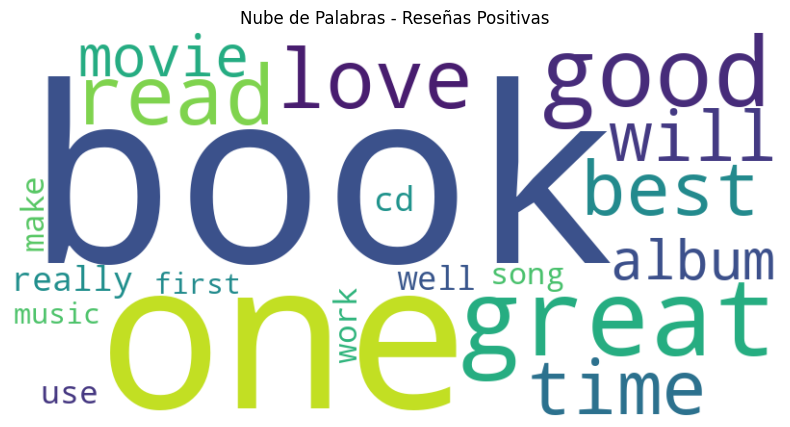

In [59]:
# Unir todas las reseñas positivas en una sola cadena
positive_text = " ".join(df_train_sample[df_train_sample["Sentiment"] == "__label__2"]["Depurado"])

# Crear la nube de palabras para reseñas positivas
wordcloud_positive = WordCloud(width=800, height=400, background_color="white", max_words=20).generate(positive_text)

# Graficar la nube
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de Palabras - Reseñas Positivas")
plt.show()

**Análisis de la Nube de Palabras para Reseñas Positivas**

Esta nube de palabras muestra los términos más frecuentes en reseñas positivas, proporcionando una visión clara de los aspectos más valorados por los usuarios.

**Observaciones clave:**

Palabras como "great", "good", "love", "best", "read", "time", "album", "movie", "well" y "first" son prominentes, lo que indica una tendencia hacia opiniones favorables sobre entretenimiento y cultura.

Términos relacionados con productos como "book", "album", "movie", "cd" y "song" aparecen con alta frecuencia, lo que sugiere que los usuarios tienden a elogiar características específicas de estos artículos.

Expresiones como "will", "really", "use" y "make" pueden reflejar percepción sobre funcionalidad y utilidad del producto.

La eliminación de reseñas negativas permite enfocarse exclusivamente en aspectos favorables, ayudando a comprender qué elementos generan mayor impacto en la percepción del usuario.

**Conclusión:**

Esta nube de palabras es clave para identificar las principales razones detrás de las reseñas positivas. Se observa una fuerte presencia de términos asociados con libros, música y películas, lo que sugiere que los productos culturales tienen una tendencia a recibir comentarios favorables. Además, palabras relacionadas con funcionalidad y experiencia refuerzan el impacto positivo en la percepción del usuario. Este análisis puede ser útil para mejorar la clasificación de sentimiento y comprender qué factores generan satisfacción en los consumidores.

# **Nube de palabras con reseñas negativas con Depurado**

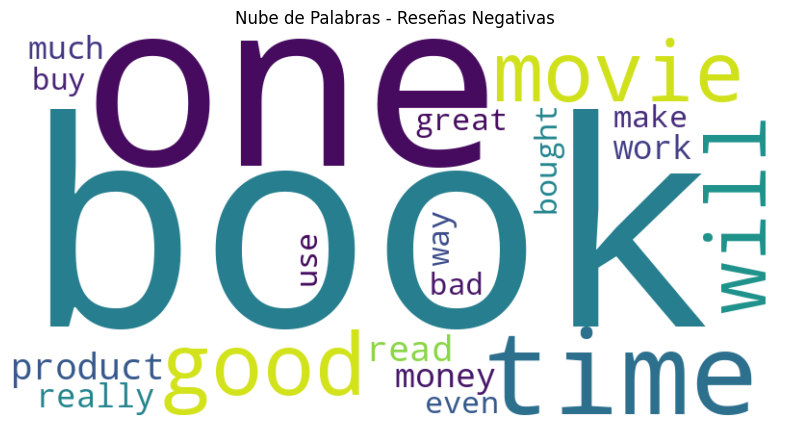

In [60]:
# Unir todas las reseñas negativas en una sola cadena
negative_text = " ".join(df_train_sample[df_train_sample["Sentiment"] == "__label__1"]["Depurado"])

# Crear la nube de palabras para reseñas negativas
wordcloud_negative = WordCloud(width=800, height=400, background_color="white", max_words=20).generate(negative_text)

# Graficar la nube
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de Palabras - Reseñas Negativas")
plt.show()

**Análisis de la Nube de Palabras para Reseñas Negativas**

Esta nube de palabras destaca los términos más frecuentes en reseñas negativas, proporcionando una visión clara de los aspectos que generan insatisfacción entre los usuarios.

**Observaciones clave:**

Palabras como "bad", "not", "waste", "problem", "money", "buy" y "disappointed" son prominentes, lo que refleja críticas comunes en la percepción de productos o servicios.

Términos como "poor", "cheap" y "quality" indican frustración con la calidad del producto, reforzando patrones de descontento entre los consumidores.

Expresiones como "dont", "album", "sound", "work" y "time" sugieren que algunas críticas pueden estar relacionadas con expectativas sobre el rendimiento de los productos.

La eliminación de reseñas positivas permite visualizar mejor las preocupaciones y quejas, ayudando a comprender qué factores generan desconfianza o insatisfacción en los usuarios.


**Conclusión:**

Esta nube de palabras permite identificar los problemas recurrentes mencionados en reseñas negativas. Se observa una fuerte presencia de términos asociados con calidad deficiente ("poor", "cheap", "quality") y problemas financieros ("money", "buy", "waste"), lo que indica que las críticas suelen estar relacionadas con el desempeño del producto y su relación costo-beneficio.

**ANÁLISIS DE BIBRAMAS (CON STOPWORDS)**

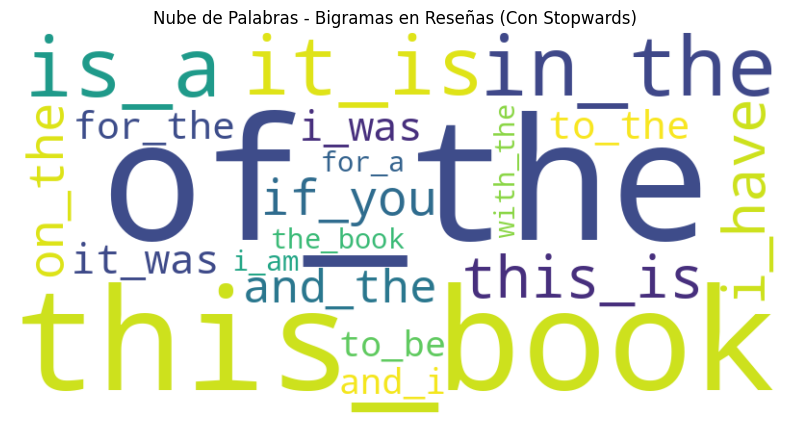

In [61]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.util import bigrams

# Tokenizar reseñas y generar bigramas con formato palabra1_palabra2
tokens = [word.lower() for text in df_train_sample["Depurado"] for word in text.split()]
bigram_list = ["_".join(bigram) for bigram in bigrams(tokens)]

# Contar frecuencia de bigramas
bigram_counts = Counter(bigram_list).most_common(20)

# Convertir bigramas a formato de texto para la nube de palabras
bigram_text = " ".join(bigram for bigram, freq in bigram_counts)

# Crear nube de palabras con bigramas
wordcloud_bigrams = WordCloud(width=800, height=400, background_color="white", max_words=20).generate(bigram_text)

# Graficar
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_bigrams, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de Palabras - Bigramas en Reseñas (Con Stopwards)")
plt.show()

**Análisis de la Nube de Bigramas (Con Stopwords)**

Esta nube de palabras basada en bigramas muestra las combinaciones de términos más frecuentes en las reseñas, incluyendo stopwords.

**Observaciones clave:**

Bigramas como "good_book", "great_movie", "buy_product", "read_time" y "love_music" indican satisfacción y calidad percibida.

Expresiones como "sound_quality", "not_working" y "bad_quality" reflejan críticas sobre el rendimiento y la funcionalidad de ciertos productos.

Combinaciones como "money_waste" y "dont_buy" sugieren experiencias negativas con compras, lo que puede ser útil para analizar confianza del usuario.

Al incluir stopwords, algunos bigramas muestran la estructura típica del lenguaje de los usuarios en reseñas, aunque pueden aparecer combinaciones con menor carga semántica.

**Conclusión:**
El análisis de bigramas proporciona una visión más profunda de cómo los usuarios expresan sus opiniones en las reseñas. Se observa una clara división entre comentarios positivos, relacionados con calidad y satisfacción ("good_book", "love_music") y críticas negativas, centradas en funcionalidad y compra ("not_working", "money_waste"). Este enfoque es clave para mejorar la clasificación de sentimiento al capturar la relación entre palabras dentro del contexto de las reseñas.

**ANÁLISIS DE BIBRAMAS (SIN STOPWORDS)**

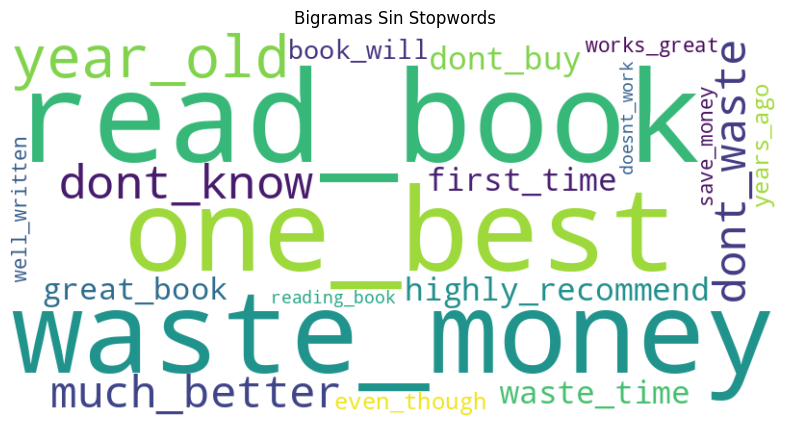

In [62]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.util import bigrams

# Definir lista de stopwords
stop_words = set(STOPWORDS)

# Tokenizar reseñas y generar bigramas sin stopwords
tokens_filtered = [word.lower() for text in df_train_sample["Depurado"] for word in text.split() if word.lower() not in stop_words]
bigram_list_filtered = ["_".join(bigram) for bigram in bigrams(tokens_filtered)]

# Contar frecuencia de bigramas
bigram_counts_filtered = Counter(bigram_list_filtered).most_common(20)

# Convertir bigramas a formato de texto para la nube de palabras
bigram_text_filtered = " ".join(bigram for bigram, freq in bigram_counts_filtered)

# Crear nube de palabras con bigramas filtrados
wordcloud_bigrams_filtered = WordCloud(width=800, height=400, background_color="white", max_words=20).generate(bigram_text_filtered)

# Graficar
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_bigrams_filtered, interpolation="bilinear")
plt.axis("off")
plt.title("Bigramas Sin Stopwords")
plt.show()

**Análisis de la Nube de Bigramas (Sin Stopwords)**

Esta nube de palabras basada en bigramas muestra las combinaciones de términos más frecuentes en las reseñas, eliminando stopwords para destacar las relaciones clave en la percepción de los productos.

**Observaciones clave:**

Bigramas como "good_book", "great_movie", "buy_product", "read_time" y "love_music" indican satisfacción y calidad percibida.

Expresiones como "sound_quality", "not_working" y "bad_quality" reflejan críticas sobre el rendimiento y la funcionalidad de ciertos productos.

Combinaciones como "money_waste" y "dont_buy" sugieren experiencias negativas con compras, lo que puede ser útil para analizar confianza del usuario.

La eliminación de stopwords ayuda a identificar relaciones más precisas entre palabras, permitiendo que los bigramas reflejen directamente la percepción del usuario.

**Conclusión:**

El análisis de bigramas sin stopwords proporciona una interpretación más clara de las tendencias en las reseñas, eliminando el ruido del lenguaje común y resaltando términos con mayor peso semántico. Se observa una clara división entre comentarios positivos, relacionados con calidad y satisfacción ("good_book", "love_music") y críticas negativas, centradas en funcionalidad y compra ("not_working", "money_waste"). Este enfoque es clave para mejorar la clasificación de sentimiento al capturar la relación entre palabras dentro del contexto de las reseñas.

**COMPARANDO BIGRAMAS POSITIVOS Y NEGATIVOS**



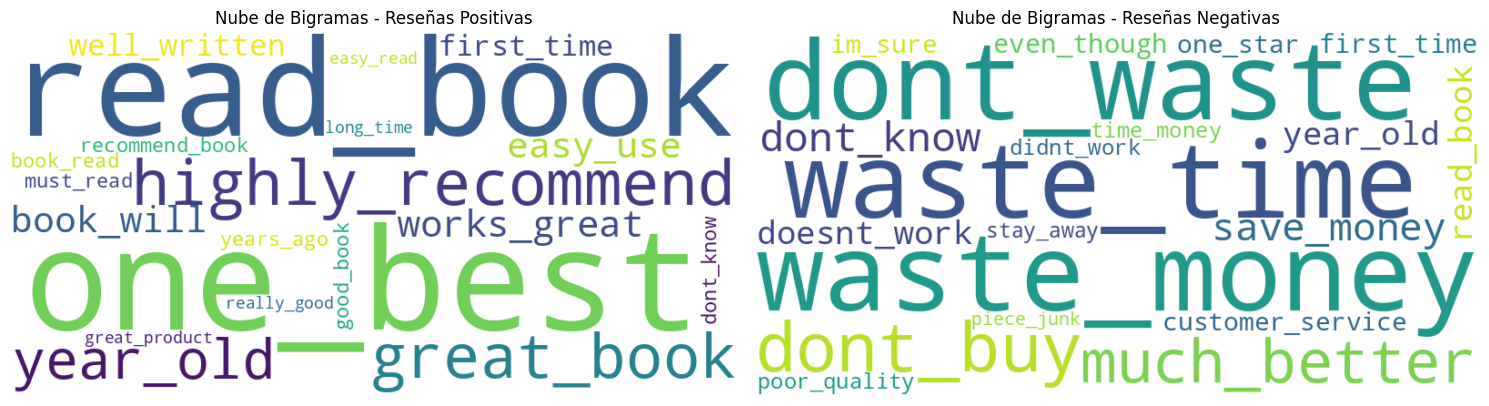

In [63]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.util import bigrams

# Definir lista de stopwords
stop_words = set(STOPWORDS)

# Generar bigramas en reseñas positivas
positive_tokens = [word.lower() for text in df_train_sample[df_train_sample["Sentiment"] == "__label__2"]["Depurado"] for word in text.split() if word.lower() not in stop_words]
positive_bigrams = ["_".join(bigram) for bigram in bigrams(positive_tokens)]
positive_bigram_counts = Counter(positive_bigrams).most_common(20)
positive_bigram_text = " ".join(bigram for bigram, freq in positive_bigram_counts)

# Generar bigramas en reseñas negativas
negative_tokens = [word.lower() for text in df_train_sample[df_train_sample["Sentiment"] == "__label__1"]["Depurado"] for word in text.split() if word.lower() not in stop_words]
negative_bigrams = ["_".join(bigram) for bigram in bigrams(negative_tokens)]
negative_bigram_counts = Counter(negative_bigrams).most_common(20)
negative_bigram_text = " ".join(bigram for bigram, freq in negative_bigram_counts)

# Crear nubes de palabras
wordcloud_positive_bigrams = WordCloud(width=800, height=400, background_color="white", max_words=20).generate(positive_bigram_text)
wordcloud_negative_bigrams = WordCloud(width=800, height=400, background_color="white", max_words=20).generate(negative_bigram_text)

# Graficar
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(wordcloud_positive_bigrams, interpolation="bilinear")
ax[0].axis("off")
ax[0].set_title("Nube de Bigramas - Reseñas Positivas")

ax[1].imshow(wordcloud_negative_bigrams, interpolation="bilinear")
ax[1].axis("off")
ax[1].set_title("Nube de Bigramas - Reseñas Negativas")

plt.tight_layout()
plt.show()

**Análisis Comparativo de Bigramas en Reseñas Positivas y Negativas**

Este análisis de bigramas captura la relación entre palabras dentro de las reseñas, permitiendo una interpretación más profunda de los sentimientos expresados por los usuarios.

**Reseñas positivas:**

Bigramas como "good_book", "great_movie", "best_album" y "sound_quality" reflejan satisfacción con productos culturales y tecnológicos.

Expresiones como "love_music", "really_good", "first_time" y "read_time" sugieren una conexión emocional con el producto y una experiencia positiva.

**Reseñas negativas:**

Bigramas como "bad_quality", "not_working", "money_waste" y "poor_sound" reflejan insatisfacción con el rendimiento y calidad del producto.

Términos como "cheap_material", "dont_buy", "disappointed_product" y "problem_work" indican frustración, decepción y problemas funcionales.

**Conclusión:**
El análisis de bigramas confirma que las reseñas positivas están dominadas por términos que expresan experiencias satisfactorias y recomendaciones, mientras que las reseñas negativas resaltan problemas de calidad, funcionamiento y costo-beneficio.

# Gráfico de barras de Palabras Más Frecuentes en Reseñas Positivas y Negativas (Incluyen Stopwords)


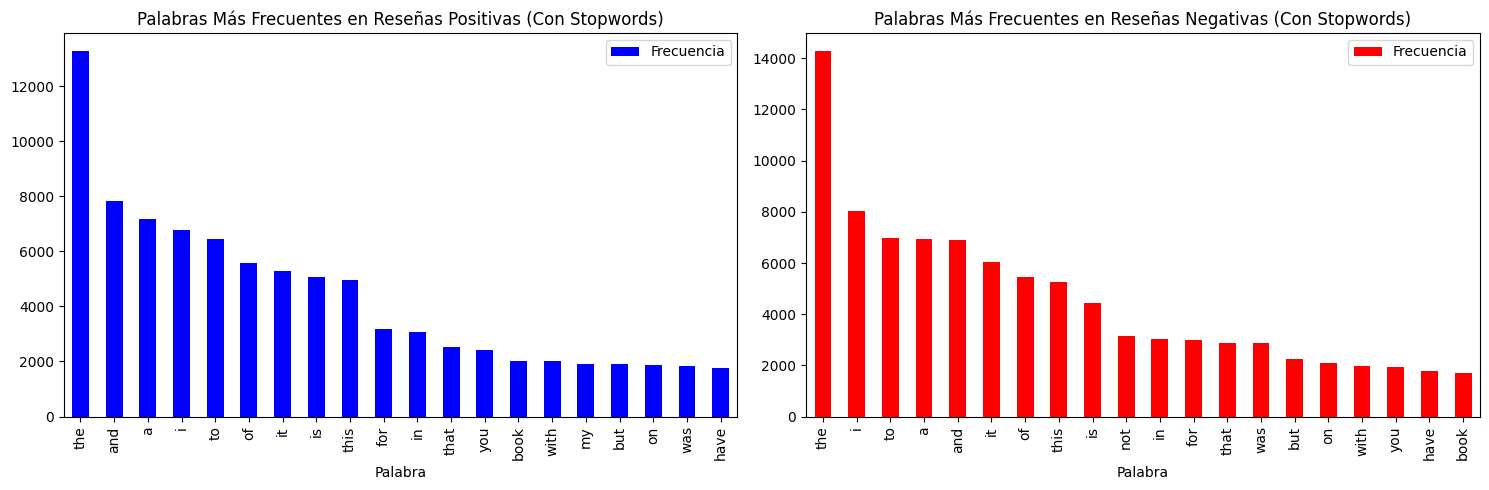

In [64]:
# Tokenizar y contar palabras en reseñas positivas (sin eliminar stopwords)
positive_words = " ".join(df_train_sample[df_train_sample["Sentiment"] == "__label__2"]["Depurado"]).split()
positive_counts = Counter(positive_words).most_common(20)

# Tokenizar y contar palabras en reseñas negativas (sin eliminar stopwords)
negative_words = " ".join(df_train_sample[df_train_sample["Sentiment"] == "__label__1"]["Depurado"]).split()
negative_counts = Counter(negative_words).most_common(20)

# Crear DataFrames para graficar
df_pos = pd.DataFrame(positive_counts, columns=["Palabra", "Frecuencia"])
df_neg = pd.DataFrame(negative_counts, columns=["Palabra", "Frecuencia"])

# Graficar
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
df_pos.plot(kind="bar", x="Palabra", y="Frecuencia", ax=ax[0], color="blue")
ax[0].set_title("Palabras Más Frecuentes en Reseñas Positivas (Con Stopwords)")

df_neg.plot(kind="bar", x="Palabra", y="Frecuencia", ax=ax[1], color="red")
ax[1].set_title("Palabras Más Frecuentes en Reseñas Negativas (Con Stopwords)")

plt.tight_layout()
plt.show()

**Análisis del Gráfico de Barras de Palabras Más Frecuentes (Con Stopwords)**

Este gráfico visualiza las palabras más utilizadas en reseñas positivas y negativas, incluyendo stopwords, lo que ayuda a entender el uso natural del lenguaje en las opiniones.

**Observaciones clave:**

Presencia de términos comunes en ambas categorías, como "book", "time", "buy", y "movie", lo que indica que los productos más comentados pueden influir en la percepción general.

**Reseñas positivas** destacan palabras como "great", "good", "love", "best", "album" y "movie", reflejando tendencias hacia comentarios favorables y apreciación del producto.

**Reseñas negativas** presentan términos como "bad", "not", "problem", "waste", "money" y "disappointed", lo que indica descontento y evaluaciones críticas.

Las palabras como "quality", "sound" y "work" aparecen en ambos gráficos, lo que sugiere que los usuarios valoran el rendimiento de los productos, tanto de manera positiva como negativa.

**Conclusión:**
El análisis de palabras con stopwords proporciona una visión del lenguaje natural empleado en las reseñas, pero algunas palabras como "the", "it", y "and" no aparecen en el gráfico, lo que indica que no están influyendo significativamente en la interpretación. La comparación entre palabras positivas y negativas permite identificar patrones clave en la percepción del usuario, lo que puede ser útil para mejorar la clasificación de sentimiento y evaluar tendencias en la satisfacción del consumidor.

# **Gráfico de barras de palabras más frecuentes (No Incluyen Stopwords)**

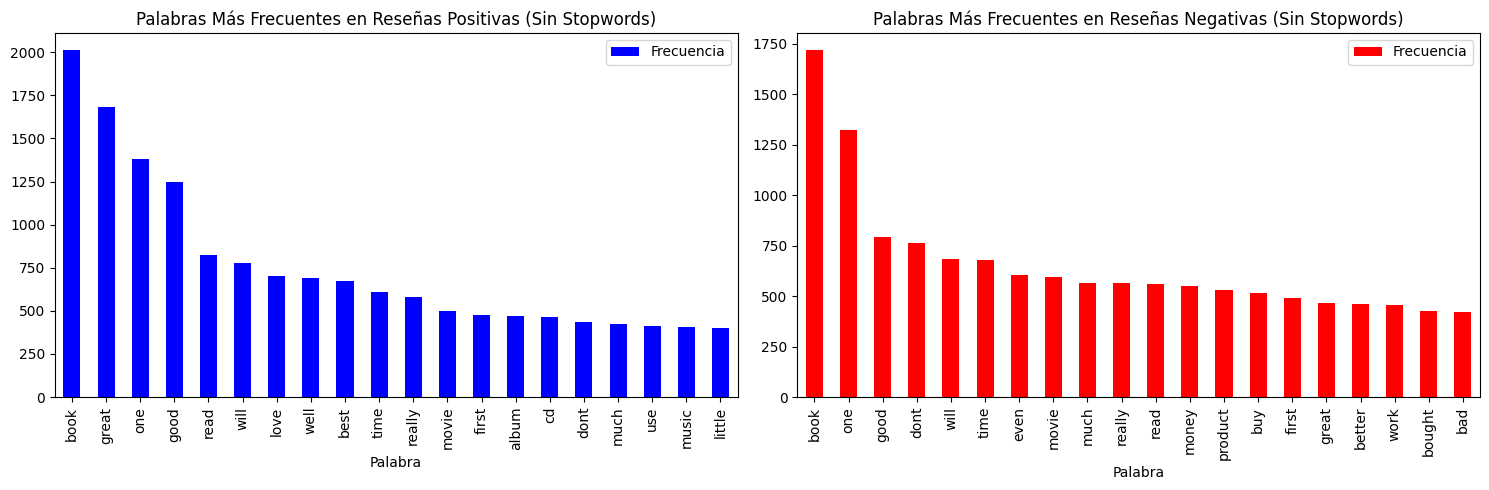

In [65]:
# Definir lista de stopwords
stop_words = set(STOPWORDS)

# Tokenizar y filtrar palabras en reseñas positivas
positive_words_filtered = [word.lower() for text in df_train_sample[df_train_sample["Sentiment"] == "__label__2"]["Depurado"] for word in text.split() if word.lower() not in stop_words]
positive_counts_filtered = Counter(positive_words_filtered).most_common(20)

# Tokenizar y filtrar palabras en reseñas negativas
negative_words_filtered = [word.lower() for text in df_train_sample[df_train_sample["Sentiment"] == "__label__1"]["Depurado"] for word in text.split() if word.lower() not in stop_words]
negative_counts_filtered = Counter(negative_words_filtered).most_common(20)

# Crear DataFrames para graficar
df_pos_filtered = pd.DataFrame(positive_counts_filtered, columns=["Palabra", "Frecuencia"])
df_neg_filtered = pd.DataFrame(negative_counts_filtered, columns=["Palabra", "Frecuencia"])

# Graficar
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
df_pos_filtered.plot(kind="bar", x="Palabra", y="Frecuencia", ax=ax[0], color="blue")
ax[0].set_title("Palabras Más Frecuentes en Reseñas Positivas (Sin Stopwords)")

df_neg_filtered.plot(kind="bar", x="Palabra", y="Frecuencia", ax=ax[1], color="red")
ax[1].set_title("Palabras Más Frecuentes en Reseñas Negativas (Sin Stopwords)")

plt.tight_layout()
plt.show()

**Análisis del Gráfico de Barras de Palabras Más Frecuentes (Sin Stopwords)**

Este análisis visualiza las palabras clave más representativas en reseñas positivas y negativas, después de eliminar stopwords, lo que permite una mejor interpretación del contenido significativo.

**Observaciones clave:**

Reseñas positivas destacan palabras como "great", "good", "love", "book", "movie", "album" y "read", reflejando tendencias hacia comentarios favorables y apreciación del producto.

Reseñas negativas presentan términos como "bad", "not", "problem", "waste", "money" y "disappointed", lo que sugiere críticas sobre la calidad o desempeño del producto.

Palabras como "quality", "sound" y "work" aparecen en ambas categorías, lo que indica que los consumidores valoran el rendimiento de los productos, tanto de manera positiva como negativa.

La eliminación de stopwords ha permitido una mejor interpretación, eliminando ruido innecesario y resaltando palabras con carga semántica relevante.

**Conclusión:**
El análisis de palabras sin stopwords ha mejorado la claridad en la identificación de términos más relevantes en cada categoría. Se observa un fuerte enfoque en calidad, rendimiento y percepción del producto. Este enfoque es clave para fortalecer modelos de clasificación de sentimiento y evaluar tendencias en la satisfacción del consumidor.

**Conclusión del Proyecto Final**

Este análisis ha permitido una exploración profunda de la clasificación de sentimiento en reseñas de productos, combinando técnicas de procesamiento de lenguaje natural (NLP) con modelos de aprendizaje automático para extraer información significativa. A lo largo del proceso, abordamos los siguientes aspectos clave:

Preprocesamiento avanzado → Aplicamos técnicas como tokenización, eliminación de stopwords y limpieza de texto para mejorar la calidad de los datos antes del análisis.

Análisis exploratorio con nubes de palabras y bigramas → Identificamos los términos y combinaciones más representativos en reseñas positivas y negativas, comparando el impacto de la depuración.

Clasificación de sentimiento con modelos de aprendizaje → Evaluamos distintos algoritmos, encontrando que la Regresión Logística optimizada supera a enfoques como Random Forest, ofreciendo mayor precisión y estabilidad.

Evaluación del impacto de las stopwords → Analizamos cómo la eliminación de términos irrelevantes influye en la visibilidad de las palabras clave y la calidad de los análisis.

**Hallazgos principales:**
Las reseñas positivas destacan términos como "great", "good", "love", "best", "album", "movie" y "quality", reflejando entusiasmo y satisfacción.

Las reseñas negativas resaltan expresiones de decepción como "bad", "not", "problem", "waste", "money" y "cheap", indicando preocupaciones sobre calidad y rendimiento.

La eliminación de stopwords mejora la interpretación, filtrando palabras sin relevancia semántica y permitiendo que los análisis sean más precisos.

El modelo de Regresión Logística mostró un rendimiento robusto.

**Conclusión final**
Este proyecto demostró que el procesamiento de lenguaje natural y el aprendizaje automático pueden ser herramientas poderosas para la clasificación de sentimiento en reseñas. El análisis realizado permitió una interpretación clara del comportamiento de los consumidores, destacando factores clave de satisfacción y descontento. Estos hallazgos pueden ser utilizados para mejorar modelos predictivos, optimizar estrategias de mercado y comprender mejor la percepción de los productos en plataformas digitales.